<a href="https://colab.research.google.com/github/chayhuixiang/tensorflow-starter/blob/main/6%20-%20Convolutional%20Neural%20Networks%20-%20CNNs/5_CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

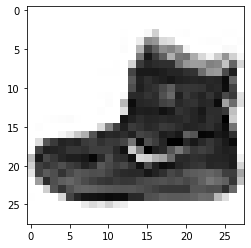

In [ ]:
plt.imshow(x_train[0],cmap='Greys')

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# Data Normalisation
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# One hot encoding with y labels
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [ ]:
len(y_cat_train[0])

10

In [ ]:
# Reshape x to fit batch_size, height, width, channels
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x=x_train,y=y_cat_train,callbacks=[early_stop],validation_data=(x_test,y_cat_test),epochs=50)

Epoch 1/50
1875/1875 [==============================] - 21s 4ms/step - loss: 0.6996 - accuracy: 0.7480 - val_loss: 0.4329 - val_accuracy: 0.8428
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4637 - accuracy: 0.8341 - val_loss: 0.3890 - val_accuracy: 0.8547
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4085 - accuracy: 0.8537 - val_loss: 0.3596 - val_accuracy: 0.8712
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3770 - accuracy: 0.8643 - val_loss: 0.3368 - val_accuracy: 0.8743
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3544 - accuracy: 0.8718 - val_loss: 0.3234 - val_accuracy: 0.8841
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3399 - accuracy: 0.8766 - val_loss: 0.3126 - val_accuracy: 0.8861
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.8823 - val_loss: 0.3051 - val_accuracy

In [ ]:
losses = pd.DataFrame(model.history.history)

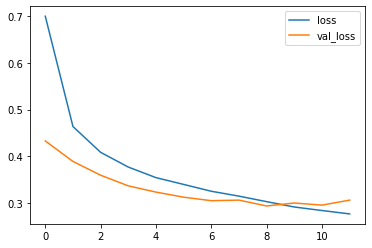

In [ ]:
losses[['loss','val_loss']].plot()

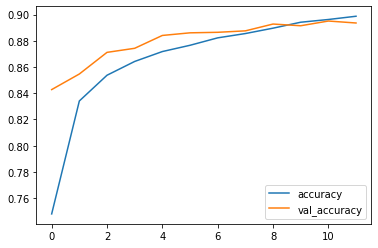

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
preds = model.predict(x_test)
predictions = np.argmax(preds,axis=1)

In [ ]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1011
           1       0.98      0.98      0.98       998
           2       0.88      0.80      0.83      1098
           3       0.90      0.90      0.90      1000
           4       0.79      0.86      0.82       909
           5       0.98      0.97      0.97      1016
           6       0.67      0.69      0.68       966
           7       0.96      0.94      0.95      1022
           8       0.98      0.97      0.97      1009
           9       0.95      0.98      0.96       971

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [ ]:
confusion_matrix(predictions,y_test)

array([[851,   0,  15,  19,   0,   0, 126,   0,   0,   0],
       [  2, 979,   1,  11,   2,   0,   1,   0,   2,   0],
       [ 16,   0, 875,  16,  95,   0,  90,   0,   5,   1],
       [ 17,   9,  11, 902,  35,   0,  24,   0,   2,   0],
       [  2,   3,  30,  15, 786,   0,  72,   0,   1,   0],
       [  1,   0,   0,   0,   0, 982,   1,  21,   3,   8],
       [103,   6,  67,  35,  80,   0, 670,   0,   5,   0],
       [  0,   0,   0,   0,   0,  10,   0, 965,   5,  42],
       [  8,   3,   1,   2,   2,   0,  16,   0, 977,   0],
       [  0,   0,   0,   0,   0,   8,   0,  14,   0, 949]])

In [ ]:
preds = model.predict(x_test[0].reshape(1,28,28,1))
y_classes = np.argmax(preds,axis=1)
y_classes

array([9])

In [ ]:
y_test[0]

9